In [2]:
import zipfile
import os
import shutil

In [20]:
# === Upload your dataset ===
from google.colab import files
uploaded = files.upload()

Saving yolo dataset.zip to yolo dataset.zip


In [21]:
import zipfile
import os

zip_path = "yolo dataset.zip"  # match your filename
extract_dir = "/content/GPR-YOLO-Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [30]:
import os

base_path = "/content/GPR-YOLO-Dataset/yolo_dataset"

# Rename folders to lowercase as expected by YOLOv5
os.rename(f"{base_path}/Images", f"{base_path}/images")
os.rename(f"{base_path}/Labels", f"{base_path}/labels")
os.rename(f"{base_path}/images/Training", f"{base_path}/images/training")
os.rename(f"{base_path}/images/Validation", f"{base_path}/images/validation")
os.rename(f"{base_path}/labels/Training", f"{base_path}/labels/training")
os.rename(f"{base_path}/labels/Validation", f"{base_path}/labels/validation")

In [31]:
!ls -R /content/GPR-YOLO-Dataset/yolo_dataset/

/content/GPR-YOLO-Dataset/yolo_dataset/:
gpr_data.yaml  images  labels

/content/GPR-YOLO-Dataset/yolo_dataset/images:
training  validation

/content/GPR-YOLO-Dataset/yolo_dataset/images/training:
0_1.png    164_1.png  230_5.png  297_0.png  363_4.png  430_1.png  496_2.png
0_2.png    164_2.png  23_0.png	 297_1.png  363_5.png  430_2.png  496_3.png
0_3.png    164_3.png  231_0.png  297_3.png  36_3.png   430_3.png  496_4.png
0_4.png    164_4.png  231_1.png  297_4.png  364_0.png  430_4.png  496_5.png
0_5.png    164_5.png  231_2.png  297_5.png  364_1.png  430_5.png  497_1.png
100_0.png  16_4.png   231_3.png  298_0.png  364_3.png  43_0.png   497_2.png
100_1.png  165_0.png  231_4.png  298_1.png  364_4.png  431_0.png  497_3.png
100_3.png  165_1.png  232_0.png  298_2.png  364_5.png  431_1.png  497_4.png
100_4.png  165_2.png  232_2.png  298_3.png  36_4.png   431_2.png  497_5.png
100_5.png  165_3.png  232_3.png  298_4.png  365_0.png  431_3.png  498_0.png
10_0.png   165_4.png  232_4.png  298_5.png  

In [32]:
yaml_path = f"{extract_dir}/yolo_dataset/gpr_data.yaml"

with open(yaml_path, 'w') as f:
    f.write(f"""
path: {extract_dir}/yolo_dataset
train: images/training
val: images/validation

nc: 1
names: ['hyperbola']
""")


In [23]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [33]:
import os
os.environ["WANDB_MODE"] = "disabled"

!python train.py \
  --img 256 \
  --batch 8 \
  --epochs 50 \
  --data /content/GPR-YOLO-Dataset/yolo_dataset/gpr_data.yaml \
  --weights yolov5s.pt \
  --project runs/train_gpr \
  --name yolov5s_gpr \
  --save-period 10 \
  --exist-ok


Streaming output truncated to the last 5000 lines.
      42/49     0.696G    0.07184    0.03188          0         31        256:  91% 316/349 [00:33<00:03, 10.28it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      42/49     0.696G    0.07188    0.03187          0         69        256:  91% 318/349 [00:33<00:03, 10.15it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      42/49     0.696G    0.07192    0.03187          0         56        256:  91% 318/349 [00:33<00:03, 10.15it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      42/49     0.696G    0.071

In [34]:
!ls runs/train_gpr/yolov5s_gpr/weights/


best.pt  epoch0.pt  epoch10.pt	epoch20.pt  epoch30.pt	epoch40.pt  last.pt


In [35]:
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.3 \
  --source /content/GPR-YOLO-Dataset/yolo_dataset/images/validation \
  --name yolov5_infer \
  --save-txt \
  --exist-ok


detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=/content/GPR-YOLO-Dataset/yolo_dataset/images/validation, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5_infer, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/310 /content/GPR-YOLO-Dataset/yolo_dataset/images/validation/0_0.png: 256x256 8 hyperbolas, 6.0ms
image 2/310 /content/GPR-YOLO-Dataset/yolo_dataset/images/validation/100_2.png: 256x256 9 hyperbolas, 6.1ms
image 3/310 /content/GPR-YOLO-Dataset/yolo_da

In [36]:
!ls -R runs/train_gpr

runs/train_gpr:
yolov5s_gpr

runs/train_gpr/yolov5s_gpr:
confusion_matrix.png				     results.csv
events.out.tfevents.1750920809.1a2db2de6f22.11263.0  results.png
events.out.tfevents.1750921579.1a2db2de6f22.16112.0  train_batch0.jpg
events.out.tfevents.1750921902.1a2db2de6f22.18150.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
hyp.yaml					     val_batch0_labels.jpg
labels_correlogram.jpg				     val_batch0_pred.jpg
labels.jpg					     val_batch1_labels.jpg
opt.yaml					     val_batch1_pred.jpg
P_curve.png					     val_batch2_labels.jpg
PR_curve.png					     val_batch2_pred.jpg
R_curve.png					     weights

runs/train_gpr/yolov5s_gpr/weights:
best.pt  epoch0.pt  epoch10.pt	epoch20.pt  epoch30.pt	epoch40.pt  last.pt


In [37]:
import glob
from IPython.display import Image, display

# Path to output folder
result_images = glob.glob('runs/detect/yolov5_infer/*.jpg')

# Display first 5 results (you can change the number)
for img_path in result_images[:5]:
    display(Image(filename=img_path))

In [38]:
!zip -r yolov5_infer_results.zip runs/detect/yolov5_infer/
from google.colab import files
files.download('yolov5_infer_results.zip')

  adding: runs/detect/yolov5_infer/ (stored 0%)
  adding: runs/detect/yolov5_infer/410_0.png (deflated 16%)
  adding: runs/detect/yolov5_infer/371_3.png (deflated 26%)
  adding: runs/detect/yolov5_infer/231_5.png (deflated 15%)
  adding: runs/detect/yolov5_infer/446_2.png (deflated 19%)
  adding: runs/detect/yolov5_infer/251_5.png (deflated 12%)
  adding: runs/detect/yolov5_infer/286_0.png (deflated 12%)
  adding: runs/detect/yolov5_infer/40_0.png (deflated 21%)
  adding: runs/detect/yolov5_infer/92_2.png (deflated 12%)
  adding: runs/detect/yolov5_infer/57_1.png (deflated 12%)
  adding: runs/detect/yolov5_infer/310_1.png (deflated 16%)
  adding: runs/detect/yolov5_infer/2_2.png (deflated 16%)
  adding: runs/detect/yolov5_infer/401_3.png (deflated 12%)
  adding: runs/detect/yolov5_infer/49_5.png (deflated 21%)
  adding: runs/detect/yolov5_infer/96_5.png (deflated 12%)
  adding: runs/detect/yolov5_infer/71_4.png (deflated 12%)
  adding: runs/detect/yolov5_infer/505_2.png (deflated 13%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

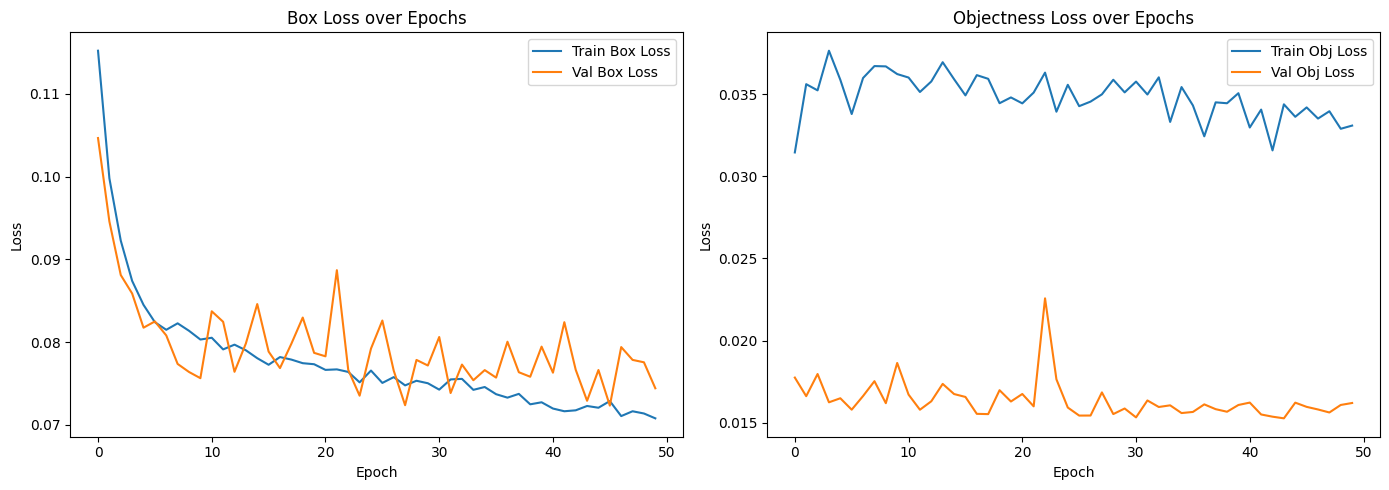

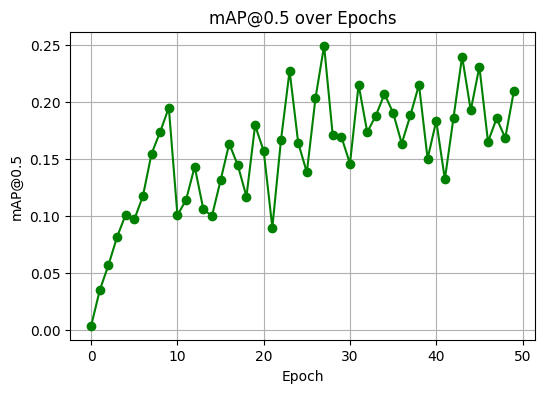

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)

# Fix the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Plot Box Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.title('Box Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Objectness Loss
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Objectness Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot mAP
plt.figure(figsize=(6, 4))
plt.plot(df['epoch'], df['metrics/mAP_0.5'], marker='o', color='green')
plt.title('mAP@0.5 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.grid(True)
plt.show()


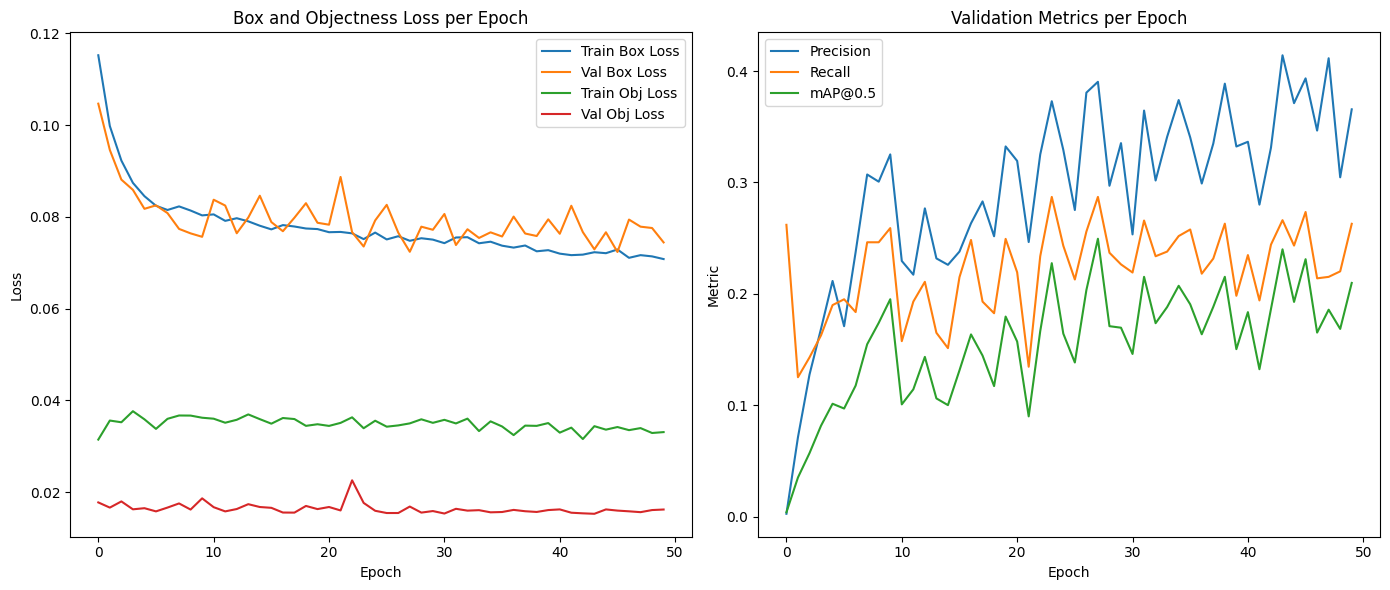

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and clean CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)
df.columns = [col.strip() for col in df.columns]

# Plot Training vs Validation Losses
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Box and Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Metrics: Precision, Recall, mAP
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
plt.title('Validation Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
last_epoch = df.iloc[-1]
print("📊 Final Epoch Stats:")
print(f"Precision: {last_epoch['metrics/precision']:.3f}")
print(f"Recall: {last_epoch['metrics/recall']:.3f}")
print(f"mAP@0.5: {last_epoch['metrics/mAP_0.5']:.3f}")
print(f"mAP@0.5:0.95: {last_epoch['metrics/mAP_0.5:0.95']:.3f}")

📊 Final Epoch Stats:
Precision: 0.366
Recall: 0.263
mAP@0.5: 0.210
mAP@0.5:0.95: 0.087


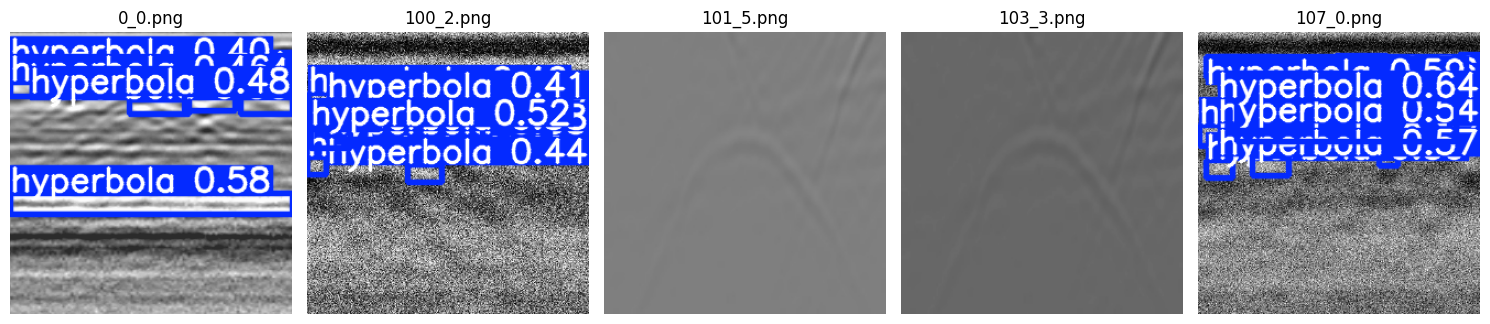

In [47]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to results
result_path = 'runs/detect/yolov5_infer'
images = sorted(os.listdir(result_path))

# Show first 5 images
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(images[:5]):
    img_path = os.path.join(result_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
plt.tight_layout()
plt.show()


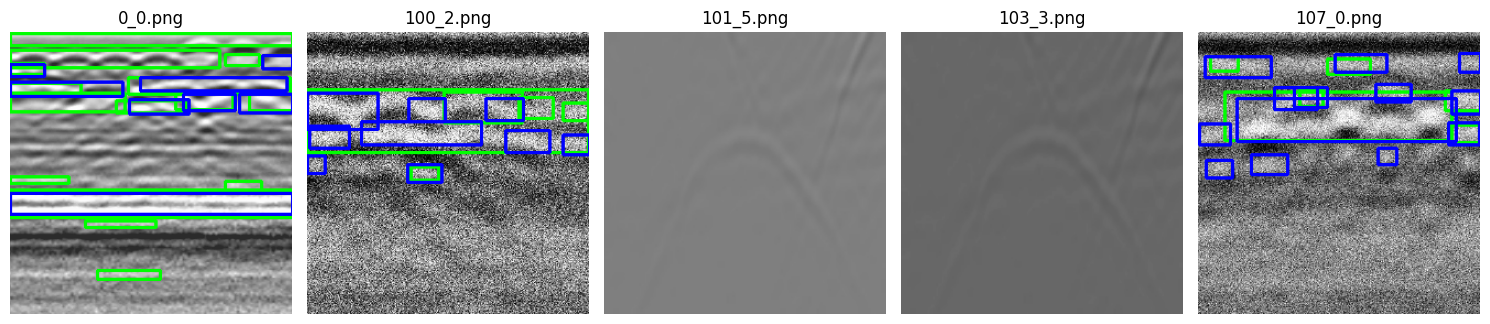

In [50]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
image_dir = '/content/GPR-YOLO-Dataset/yolo_dataset/images/validation'
gt_label_dir = '/content/GPR-YOLO-Dataset/yolo_dataset/labels/validation'
pred_label_dir = 'runs/detect/yolov5_infer/labels'

# Draw bounding boxes
def draw_boxes(img_path, gt_path, pred_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Draw ground truth boxes (green)
    if os.path.exists(gt_path):
        with open(gt_path, 'r') as f:
            for line in f:
                cls, xc, yc, bw, bh = map(float, line.strip().split())
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw predicted boxes (red)
    if os.path.exists(pred_path):
        with open(pred_path, 'r') as f:
            for line in f:
                cls, xc, yc, bw, bh = map(float, line.strip().split())  # fixed here
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Visualize a few images
images = sorted(os.listdir(image_dir))[:5]
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(images):
    img_path = os.path.join(image_dir, img_file)
    gt_path = os.path.join(gt_label_dir, img_file.replace('.png', '.txt'))
    pred_path = os.path.join(pred_label_dir, img_file.replace('.png', '.txt'))

    img_with_boxes = draw_boxes(img_path, gt_path, pred_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_with_boxes)
    plt.title(img_file)
    plt.axis('off')
plt.tight_layout()
plt.show()
